# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


# Finding and Plotting the Minimum of $f(x) = \sqrt{x^2 + 5}$

This script demonstrates the use of the **`scipy.optimize.minimize`** function to find the minimum of the function $f(x) = \sqrt{x^2 + 5}$, followed by plotting the function over the interval \([-5, 5]\).

## Mathematical Function:
The function is defined as:
\[
$f(x) = \sqrt{x^2 + 5}$
\]
Its domain is all real numbers (\( $x\in \mathbf{R}$ \)) since the square root of any positive value is defined.

## Numerical Optimization:
To find the minimum value of \( f(x) \), we:
1. Used the **BFGS** method in `scipy.optimize.minimize`.
2. Provided an initial guess \( x_0 = 0 \).
3. Obtained the minimum \( f(x) \) and its corresponding \( x \).

## Plotting:
The function is plotted over \([-5, 5]\), and the minimum point is highlighted in red.


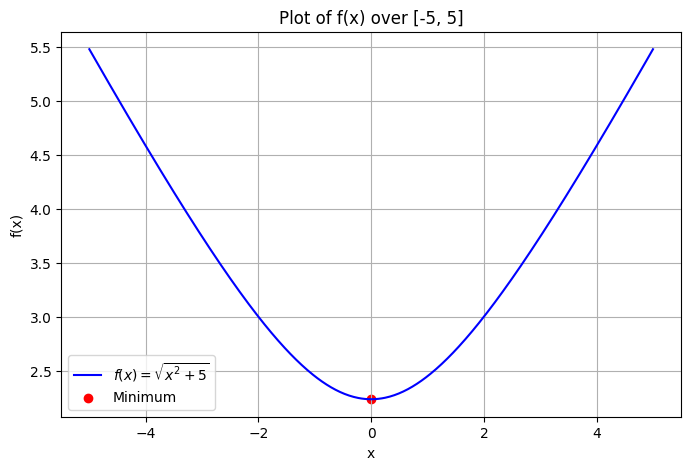

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
result = minimize(f, x0=0, jac=grad_f, method='BFGS')
x_min_analytical = result.x[0]
f_min_analytical = f(x_min_analytical)

# Plot the function over the interval [-5, 5]
x_vals = np.linspace(-5, 5, 500)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \sqrt{x^2 + 5}$", color="blue")
plt.scatter(x_min_analytical, f_min_analytical, color="red", label="Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) over [-5, 5]")
plt.legend()
plt.grid()
plt.show()



# Gradient Descent for Minimizing \( $f(x) = \sqrt{x^2 + 5}$ \)

This script demonstrates the implementation of the **Gradient Descent Algorithm** to minimize the function \( $f(x) = \sqrt{x^2 + 5}$ \). The code also plots the values of \( $f(x_k)$ \) at each iteration to visualize the convergence.

## Mathematical Background:

The **gradient descent** algorithm updates the variable \( $x$ \) iteratively using the formula:
\[
$x_{k+1} = x_k - \alpha \cdot \nabla f(x_k)$
\]
where:
- \( $\nabla f(x)$ \) is the gradient of the function \( $f(x)$ \),
- \( $\alpha$ \) is the step size, and
- \( $x_0$ \) is the initial guess.

The gradient of \( $f(x) = \sqrt{x^2 + 5}$ \) is computed as:
\[
$\nabla f(x) = \frac{x}{\sqrt{x^2 + 5}}$
\]


x_T: 3.291399714148593e-13


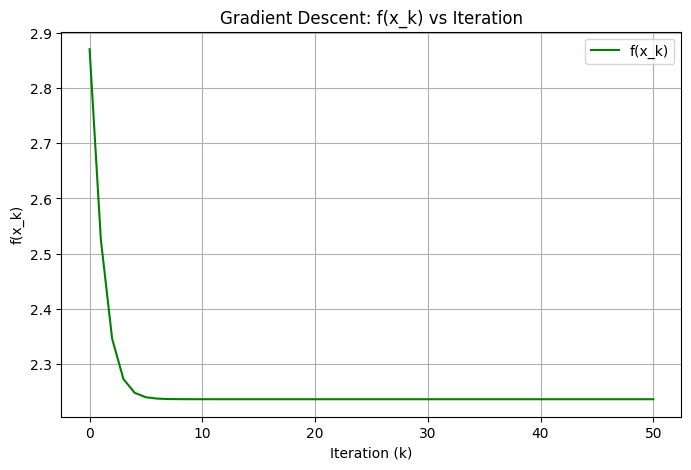

In [ ]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

# Gradient Descent Algorithm
def grad_desc_algo(x_0, step_size, num_iterations):
  x_vals_gd = [x0]
  for _ in range(num_iterations):
      x_new = x_vals_gd[-1] - step_size * grad_f(x_vals_gd[-1])
      x_vals_gd.append(x_new)

  return x_vals_gd


# set up/assign initial values
T = 50  # Number of iterations
step_size = 1  # Step size (alpha)
x0 = 1.8  # Example initial guess


# Run gradient descent by calling the function
x_k = grad_desc_algo(x0, step_size, T)
function_vals = [f(i) for i in x_k]

# report x_T by printing out the value
print(f"x_T: {x_k[-1]}")


# Plot the f(x_k) values vs. iteration number
plt.figure(figsize=(8, 5))
plt.plot(range(T + 1), function_vals, color="green", label="f(x_k)")
plt.xlabel("Iteration (k)")
plt.ylabel("f(x_k)")
plt.title("Gradient Descent: f(x_k) vs Iteration")
plt.legend()
plt.grid()
plt.show()



# Convergence Analysis for Different Step Sizes

This section analyzes the convergence of the Gradient Descent Algorithm for various step sizes (\( $\alpha$ \)). We compare the differences between consecutive function values across iterations and visualize their behavior for each step size.

## Step Sizes:
The step sizes used in this analysis are:
\[
$\text{Step sizes: } [5, 3, 1, 0.5]$
\]

## Methodology:
1. For each step size, the Gradient Descent Algorithm is performed for \($ T = 50$ \) iterations starting with an initial guess \( $x_0 = 1.8$ \) beacause my last digit of id number is 4.
2. The differences between consecutive values of \( $x_k$ \) are calculated:
   \[
   $\text{Difference: } x_{k-1} - x_k$
   \]
3. These differences are plotted against the iteration number for each step size.

## Visualization:
The graph below shows the convergence behavior of the Gradient Descent Algorithm for different step sizes. Each curve represents the differences for a specific step size.

## Observations:
- Larger step sizes (\( $\alpha = 5, 3$ \)) may lead to faster convergence but could overshoot or oscillate.
- Smaller step sizes (\( $\alpha = 0.5$ \)) provide smoother convergence but require more iterations to approach the minimum.

## Plot:
\[
$\text{The y-axis represents } f(x_{k-1}) - f(x_k) \text{ and the x-axis represents the iteration number (k).}$
\]

- Each curve is labeled with its corresponding step size.
- The grid and legend provide additional clarity for interpreting the graph.



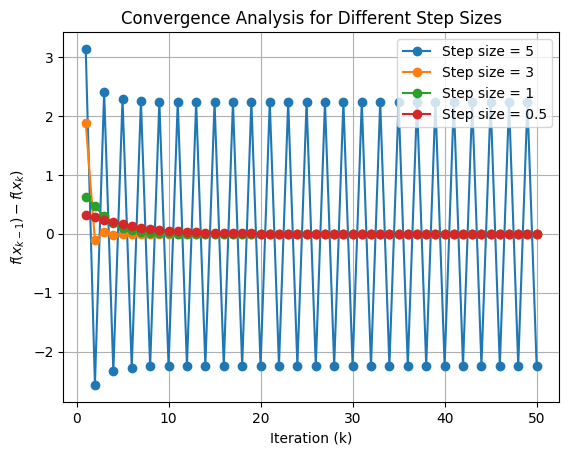

In [ ]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]


# initialize a list to store the results from different step sizes
x_k_vals_for_different_step_sizes = []

# loop through the step sizes and perform GD and record results
for alpha in step_sizes:
    x_k_vals_for_different_step_sizes.append(grad_desc_algo(x0, alpha, T))

# calculate differences
difference = []
for i in range(len(x_k_vals_for_different_step_sizes)):
    tmp = []
    for j in range(1, len(x_k_vals_for_different_step_sizes[i])):
        tmp.append(
            x_k_vals_for_different_step_sizes[i][j - 1] - x_k_vals_for_different_step_sizes[i][j]
        )
    difference.append(tmp)

# plot multiple curves in a single graph
for i in range(len(difference)):
    plt.plot(
        range(1, len(difference[i]) + 1),
        difference[i],
        marker="o",
        label=f"Step size = {step_sizes[i]}",
    )
plt.xlabel("Iteration (k)")
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")
plt.title("Convergence Analysis for Different Step Sizes")
plt.legend()
plt.grid()
plt.show()


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)





## Synthetic Data Generation:
1. 100 random 2D data points (\( $X_1, X_2$ \)) are generated.
2. The dependent variable (\( $y$ \)) is computed using the equation:
   \[
   $y = 4 + 4X_1 + 0.5X_2 + \text{noise}$
   \]
   where "noise" is added using a normal distribution to simulate real-world variations.

## Normal Equation:
The parameters of the regression plane (\( \$theta$ \)) are computed using the **normal equation**:
\[
$\theta = (X^T X)^{-1} X^T y$
\]
This gives the intercept and coefficients for the best-fit regression plane.

## Results:
- **Intercept (\( $\theta_0 $\))**: Printed in the output.
- **Coefficients (\( $\theta_1, \theta_2 $\))**: Printed in the output.

## Visualization:
- A **scatter plot** of the data points (\( $X_1, X_2, y$ \)) is created.
- The **regression plane** is plotted using the calculated coefficients to show the best fit.

## Plot Description:
1. **Axes**:
   - \( $X_1$ \): The first feature of the data.
   - \( $X_2$ \): The second feature of the data.
   - \($ y $\): The dependent variable.
2. **Regression Plane**:
   - Created using the equation:
     \[
     $y_{\text{pred}} = \theta_0 + \theta_1 X_1 + \theta_2 X_2$
     \]
   - Visualized as a smooth surface overlaying the data points.
3. **Color Scheme**:
   - Data points: Blue.
   - Regression plane: Orange.

## Observations:
- The regression plane fits the data well, capturing the trend of \( $y$ \) based on \( $X_1$ \) and \( $X_2$ \).
- The visualization helps in understanding how the independent variables influence the dependent variable.


Intercept: 3.904321447349161
Coefficients: [3.86127951 0.76690595]


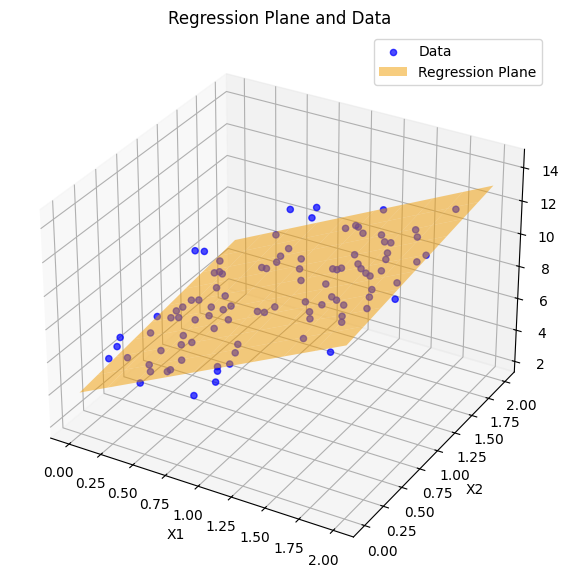

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(94)  # Change the seed to be the last two digits of your SB ID (example: 23).
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # Add a column of ones as the first column of X

# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # Normal equation: theta = (X^T X)^-1 X^T y

# Print the intercept and coefficients of the regression plane
print("Intercept:", theta_best[0])
print("Coefficients:", theta_best[1:])

# Plot the generated data and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], y, color="blue", alpha=0.7, label="Data")

# Create a grid of points for the regression plane
x0, x1 = np.meshgrid(np.linspace(0, 2, 10), np.linspace(0, 2, 10))
y_pred = theta_best[0] + theta_best[1] * x0 + theta_best[2] * x1

# Plot the regression plane
ax.plot_surface(x0, x1, y_pred, color="orange", alpha=0.5, label="Regression Plane")

# Labels and legend
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("Regression Plane and Data")
plt.legend()
plt.show()



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Sigmoid activation function: maps input values to a range (0, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set random seed for reproducibility
np.random.seed(595)

# Generate synthetic dataset with two features and 100 samples
X = np.random.rand(2, 100) # Features (2-dimensional)
w_true = np.array([1.5, -2.5])  # True weights
b_true = 1.0  # True bias

# Generate true probabilities using sigmoid and assign binary labels
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int) # Binary labels (0 or 1)

# Add some noise to the features
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split dataset into training and testing sets
X_train, X_test = X[:,:80], X[:,80:] # 80% training, 20% testing
Y_train, Y_test = Y[:80], Y[80:]

# Initialize weights and bias for the logistic regression model
w = np.zeros(X.shape[0]) # Initialize weights to zero
b = 0.0 # Initialize bias to zero

# Hyperparameters to tune
learning_rate = 0.1  # Adjusted learning rate
num_epochs = 1000  # Increased number of epochs for better convergence

# Gradient descent loop
for epoch in range(num_epochs):
    # Compute predictions for the training set using the sigmoid function
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients of the cost function with respect to weights and bias
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) # Gradient for weights
    dJdb = np.mean(A_train - Y_train) # Gradient for bias

    # Update weights and bias using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Evaluate model performance on the training set
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int) # Convert probabilities to binary predictions

# Evaluate model performance on the testing set
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Compute accuracy for both training and testing sets
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

# Print accuracies
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


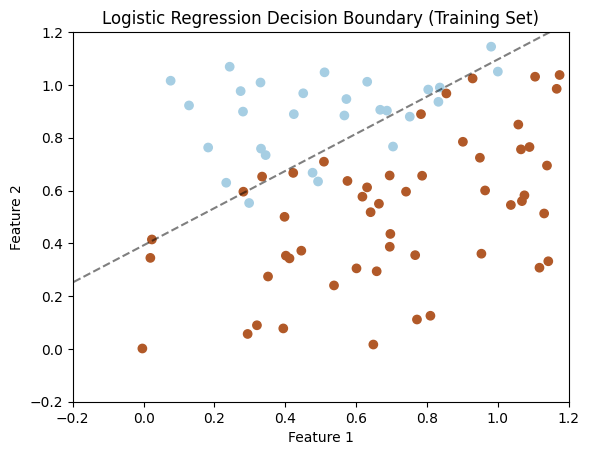

In [2]:
# Visualize the decision boundary on the training set
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate grid points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Set)')
plt.show()

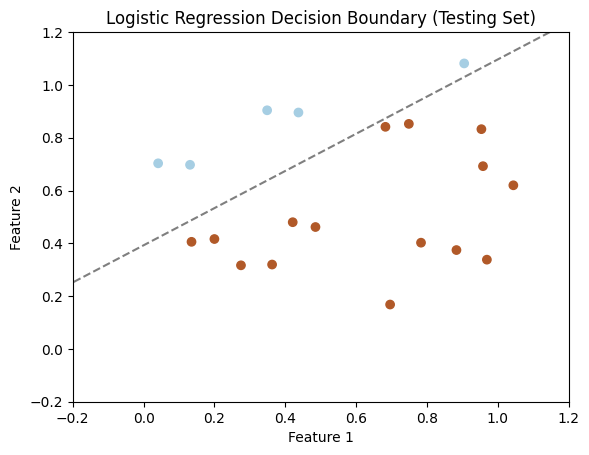

In [3]:
# Visualize the decision boundary on the testing set
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate grid points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Testing Set)')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5